#**Question 1**


# Importing required library

In [1]:
#  Import Libraries such as Numpy, Panda and Matplotlib 
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,  classification_report

#**Loading the dataset**

In [2]:
# Read Input file from Desktop using File Library of Google collab.
Inp_data = files.upload()

Saving leukemia_remission.csv to leukemia_remission.csv


Read csv data uding panda's library

In [2]:
# Get into Data frames from file
Data = pd.read_csv('leukemia_remission.csv')

Check header of data

In [3]:
#Display Header of Data
Data.head()

,REMISS,CELL,SMEAR,INFIL,LI,BLAST,TEMP
0,1,0.8,0.83,0.66,1.9,1.10,1.00
1,1,0.9,0.36,0.32,1.4,0.74,0.99
2,0,0.8,0.88,0.70,0.8,0.18,0.98
3,0,1.0,0.87,0.87,0.7,1.05,0.99
4,1,0.9,0.75,0.68,1.3,0.52,0.98


In [4]:
# Check the size of Data
Data.describe()

,REMISS,CELL,SMEAR,INFIL,LI,BLAST,TEMP
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,0.333333,0.881481,0.635185,0.570741,1.003704,0.688519,0.997407
std,0.480384,0.186645,0.214052,0.237567,0.467795,0.534960,0.014830
min,0.000000,0.200000,0.320000,0.080000,0.400000,0.000000,0.980000
25%,0.000000,0.825000,0.430000,0.335000,0.650000,0.230000,0.990000
50%,0.000000,0.950000,0.650000,0.630000,0.900000,0.520000,0.990000
75%,1.000000,1.000000,0.835000,0.740000,1.250000,1.060000,1.005000
max,1.000000,1.000000,0.970000,0.920000,1.900000,2.060000,1.040000


Check data has any missing values

In [5]:
# Check if our data has any null values 
Data.isnull().any()

REMISS    False
CELL      False
SMEAR     False
INFIL     False
LI        False
BLAST     False
TEMP      False
dtype: bool

There is no missing values in provided data set

We have checked data type of dataset

In [6]:
# Cecking out the data types for each of our variables. We want to get a sense of whether or not data is numerical (int64, float64) or not (object). 
Data.dtypes

REMISS      int64
CELL      float64
SMEAR     float64
INFIL     float64
LI        float64
BLAST     float64
TEMP      float64
dtype: object

We have checked the data size( Rows and columns)

In [7]:
print ("Number of observations :: ", len(Data.index))
print ("Number of columns :: ", len(Data.columns))

Number of observations ::  27
Number of columns ::  7


**Box Plot**

General box plot is created to understand data

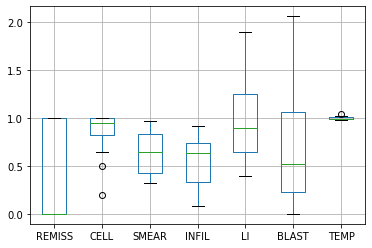

In [8]:
pd.set_option('max_columns', 10)
Data.boxplot()
plt.show()


We have created box plot of each indepent feature with respect to dependent feature with each output type

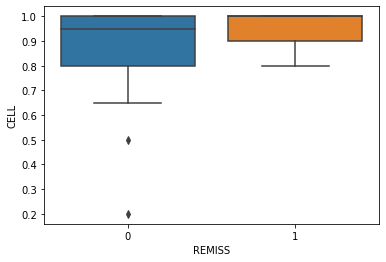

In [9]:
sns.boxplot(y='CELL', x='REMISS', data=Data)


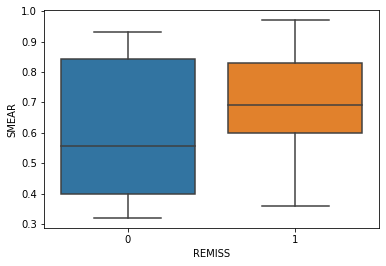

In [10]:
sns.boxplot(y='SMEAR', x='REMISS', data=Data)

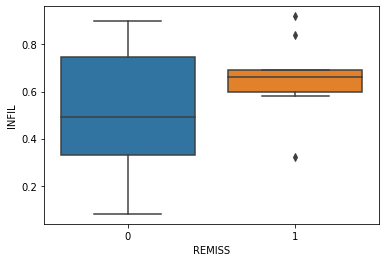

In [11]:
sns.boxplot(y='INFIL', x='REMISS', data=Data)

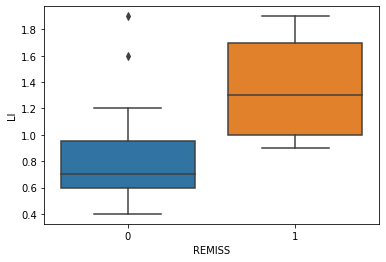

In [12]:
sns.boxplot(y='LI',x='REMISS', data=Data)

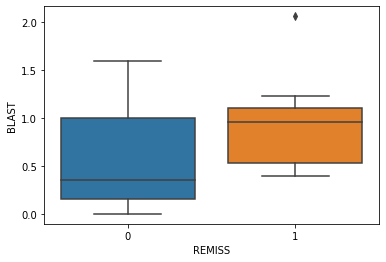

In [13]:
sns.boxplot(y='BLAST',x='REMISS', data=Data)

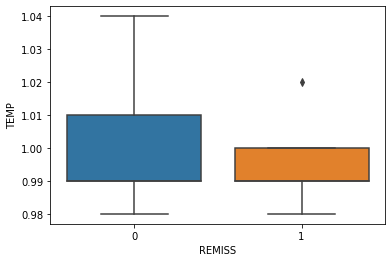

In [14]:

sns.boxplot(y='TEMP',x='REMISS', data=Data)

We have calcualted correlation matrix for checking correlation of input variables with output variable

In [15]:
df_correlation = Data
for (columnName, columnData) in df_correlation.iteritems():
# for columns in column_cat:
    b, c = np.unique(df_correlation[columnName],return_inverse=True)
    df_correlation[columnName] = c

df_correlation.head()

,REMISS,CELL,SMEAR,INFIL,LI,BLAST,TEMP
0,1,4,16,14,13,16,2
1,1,6,2,4,10,10,1
2,0,4,19,17,4,3,0
3,0,8,18,22,3,14,1
4,1,6,14,15,9,8,0


In [16]:
from scipy.stats import pointbiserialr, spearmanr

In [17]:
columns_names = df_correlation.columns
parameter = []
correlation = []
absolute_corr = []
for columns in columns_names:
    if columns != "REMISS":
        if len(df_correlation[columns].unique()) <= 2:
            corr = spearmanr(df_correlation['REMISS'],df_correlation[columns])[0]
        else:
            corr = pointbiserialr(df_correlation['REMISS'],df_correlation[columns])[0] # For dichotomous data we use the pointbiserialr
        parameter.append(columns)
        correlation.append(corr)
        absolute_corr.append(abs(corr))
parameter_df = pd.DataFrame({'correlation': correlation,'parameter':parameter, 'absolute_correlation':absolute_corr})
parameter_df = parameter_df.sort_values(by=['absolute_correlation'],ascending = False)
parameter_df = parameter_df.set_index('parameter')
parameter_df

,correlation,absolute_correlation
parameter,,
LI,0.566294,0.566294
BLAST,0.385401,0.385401
CELL,0.266076,0.266076
INFIL,0.197934,0.197934
SMEAR,0.156279,0.156279
TEMP,-0.135217,0.135217


Based on correlation calculated we have created Heat map for the features

In [18]:
Coor_mat = Data.corr()

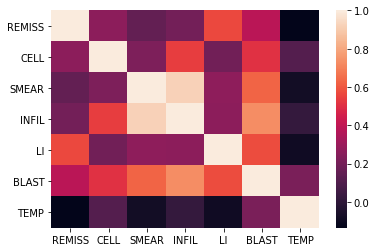

In [19]:
sns.heatmap(Coor_mat)

# Principal component analysis

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [21]:
#Executing the PCA algorithm to detect the top dimensions or features that will majorly affect the target variable

x_Std=StandardScaler().fit_transform(Data)

pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x_Std)

principalDf = pd.DataFrame(data = principalComponents)
principalDf

,0,1,2,3,4,5
0,1.710474,-1.458305,-0.214802,1.630213,-0.240491,0.002264
1,-0.330764,-2.296274,-0.870722,-0.217318,0.076515,-0.336370
2,-0.304386,0.457411,2.289725,0.315747,-0.150433,0.584484
3,1.343965,1.397335,1.066265,-0.632445,0.179910,-0.321452
4,0.939005,-1.576318,0.937345,-0.213903,-0.492126,0.347891
5,-0.294189,0.502497,1.072153,-1.365227,0.374147,-0.332784
6,2.687371,-0.051047,0.939077,-0.028114,-1.080856,-0.314990
7,2.347470,0.979204,-1.074426,1.475783,1.151769,0.480039
8,-0.990684,0.454557,-0.531632,-0.915090,0.459225,0.296689
9,-2.121386,1.457210,-2.158461,-0.299889,-0.519241,0.882537


Visiualizing all data in different format such as histogram and scatter plot

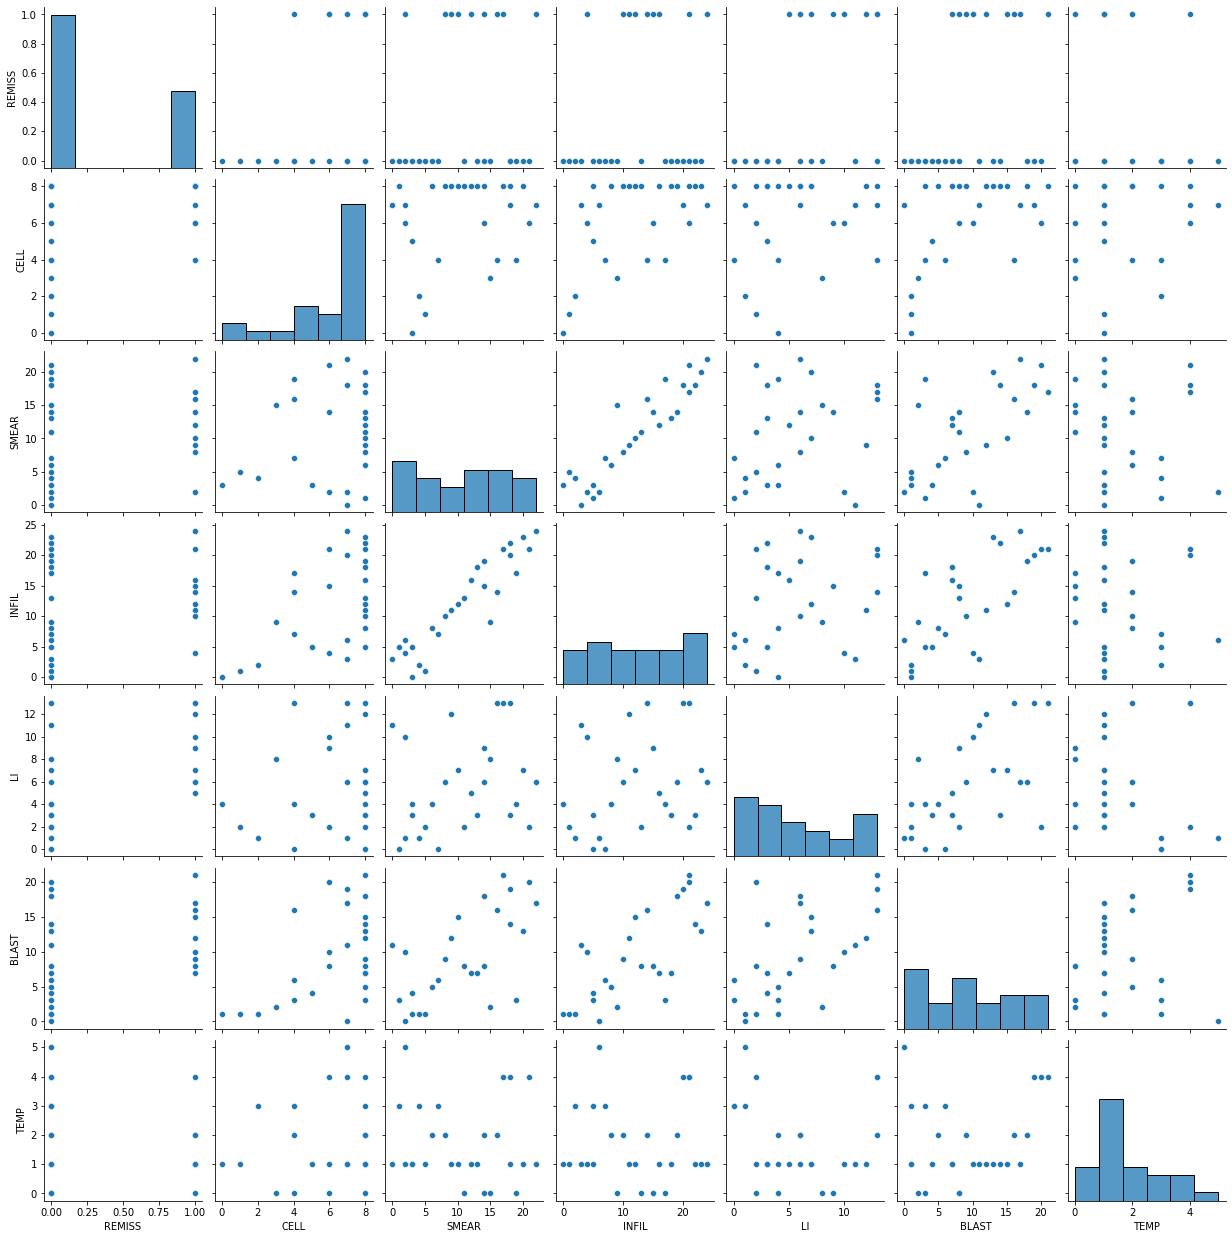

In [22]:
sns.pairplot(Data)

#Spliting data into train and test set using K- Fold algorithm

In [23]:
# Import scikit-learn libraries
from sklearn.model_selection import KFold
import numpy as np

In [24]:
# Split data in to X and Y 
# First column as Y
y = Data.iloc[:, 0:1]

In [25]:
# All other column as X except column 1
X = Data.iloc[:, 1:7]

We are doing 10 folf cross validation

In [26]:
# to demonstrate how the data are split, we will create 10 folds. 
# KFold function has to be applied on the data and it returns an location (index) of the train and test samples.
kf = KFold(n_splits=10, shuffle=True)

In [27]:
## Splitting the data into 1o folds
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

count = 1;

## Looping through each fold 

for train_index, test_index in kf.split(X):
    print("######################## " + "Iteration " + str(count) + " ########################")
    print("         ","TRAIN:", train_index)
    print("         ", "TEST:", test_index)
    print()
    X_train = X.iloc[train_index]
    X_test  = X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    count = count +1
        
    #### Logistical Regression
    clf = LogisticRegression(random_state = 1)
    clf.fit(X_train, y_train)
    y_pred_log = clf.predict(X_test)
    # Create classification report for predicted values of Y and Test data for Y
    report = classification_report(y_test, y_pred_log) 
    print("Classification Report", report, sep='\n')
    print ("Accuracy : ", accuracy_score(y_test, y_pred_log))
    print()
  

######################## Iteration 1 ########################
          TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 17 18 19 20 22 23 24 25 26]
          TEST: [ 7 16 21]

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3

Accuracy :  0.6666666666666666

######################## Iteration 2 ########################
          TRAIN: [ 0  1  2  3  4  5  7  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25 26]
          TEST: [ 6  8 18]

Classification Report
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg     

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wi

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Accuracy :  0.5



We have done logstic regression for one some to create cufusion matrix and classification report 

In [30]:
# # Split data into training set and test set consider test size as 33%
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(
    X, y, test_size=0.33, random_state=0)

In [31]:
# Check shape of Training Data set
X_train_single.shape, y_train_single.shape


((18, 6), (18, 1))

In [32]:
# Check shape of test data set
X_test_single.shape, y_test_single.shape

((9, 6), (9, 1))

In [33]:
# We need to create an instance classifier and fit it to the training data.
classifier = LogisticRegression(random_state=0)

classifier.fit(X_train_single, y_train_single)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
# we will predict data using test data set
y_pred = classifier.predict(X_test_single)

In [35]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 1])

In [36]:
# Create confusion matrix using predicted values of Y and Test data for Y
cm = confusion_matrix(y_test_single, y_pred)

In [37]:
# Create classification report for predicted values of Y and Test data for Y
report = classification_report(y_test_single, y_pred) 

In [38]:
# Check accuracy of predicted values of y
acc = accuracy_score(y_test_single, y_pred)

In [39]:
print("Confusion Matrix" , cm, sep='\n')
print("Classification Report", report, sep='\n')
print( "Accuracy Score" ,acc, sep= '\n')

Confusion Matrix
[[3 4]
 [0 2]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.43      0.60         7
           1       0.33      1.00      0.50         2

    accuracy                           0.56         9
   macro avg       0.67      0.71      0.55         9
weighted avg       0.85      0.56      0.58         9

Accuracy Score
0.5555555555555556


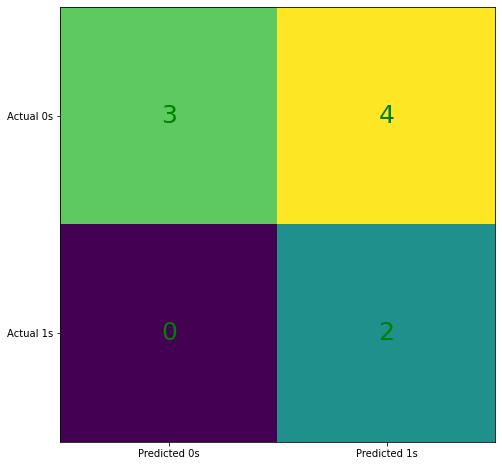

In [40]:
# Create confusion matrix using Heat map
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='Green', fontsize = '25')
plt.show()

#Model Paramters and Logistical Regression Equation

In [41]:
import numpy as np
# Retrieve the model parameters.
print("Model Paramters ")
print ("    Intercept - ", classifier.intercept_)
print ("    Coefficients - ", classifier.coef_)
classifier.coef_ = np.round_(classifier.coef_,decimals=2)
print()
print("Logistical regression equation")
#Constructing the logistical equation 
print( "    1/(1+e**(-(",str(classifier.coef_[0][0])+"*CELL + ("+
      str(classifier.coef_[0][1]) +"*SMEAR) + "+ str(classifier.coef_[0][2]) +"*LI + " + str(classifier.coef_[0][3]) 
    
      +"*BLAST + (" + str(classifier.coef_[0][4])   +"*TEMP) )))"  )
   

Model Paramters 
    Intercept -  [-4.09742337]
    Coefficients -  [[ 0.46813628  0.10437903 -0.14555066  0.51191503  0.03470569 -1.15936536]]

Logistical regression equation
    1/(1+e**(-( 0.47*CELL + (0.1*SMEAR) + -0.15*LI + 0.51*BLAST + (0.03*TEMP) )))
